<a href="https://colab.research.google.com/github/tablehan/deepLearningPractice/blob/main/model_measure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import joblib
import time
import datetime
import os
print(os.path.abspath(''))

/content


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/tempdata/transformed_day/daily_BTC-USDT.csv",index_col="open_day")
model=tf.keras.models.load_model('/content/drive/MyDrive/tempdata/bdse27_lstm_model_20221012cci30.h5')
scalar=joblib.load('/content/drive/MyDrive/tempdata/scaler_20221012cci30_5.save')
# hyper param
timeStep=10
batch_size=4
epochs=100
d=0.2

In [ ]:
df = df.rename(columns={'open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'})
df

,Open,High,Low,Close,Volume
open_day,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.15038
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.88826
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.30976
2017-08-20,4139.98,4211.08,4032.62,4086.29,467.08302
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.74306
...,...,...,...,...,...
2022-09-21,18874.31,19956.00,18125.98,18461.36,385034.10021
2022-09-22,18461.36,19550.17,18356.39,19401.63,379321.72111
2022-09-23,19401.63,19500.00,18531.42,19289.91,385886.91829


In [ ]:
scaled_data=scalar.transform(df)
scaled_data

array([[ 0.0796245 ,  0.08181432,  0.08669016,  0.08033909, -0.0199501 ],
       [ 0.08036809,  0.07838718,  0.07802511,  0.07477334, -0.0199501 ],
       [ 0.07480027,  0.07276417,  0.07508891,  0.07576895, -0.0199501 ],
       ...,
       [ 0.55666412,  0.53370812,  0.56069865,  0.55293886, -0.01994906],
       [ 0.5531018 ,  0.5281745 ,  0.56975897,  0.54130374, -0.01994946],
       [ 0.5415515 ,  0.51853204,  0.5733342 ,  0.54316486, -0.01995004]])

In [ ]:
# split data 
X = np.array([scaled_data[i-timeStep:i,:] for i in range(timeStep, len(scaled_data))])
y = np.array([scaled_data[i,:] for i in range(timeStep, len(scaled_data))])
pred_y = model.predict(X)
pred_y = scalar.inverse_transform(pred_y)


58/58 [==============================] - 2s 5ms/step


In [ ]:
dic={0:"Open",1:"High",2:"Low",3:"Close",4:"Volume"}
combined = df.iloc[timeStep:,:]
for i in dic:
  combined["pred_"+dic[i]]=pred_y[:,i]
combined

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Open,High,Low,Close,Volume,pred_Open,pred_High,pred_Low,pred_Close,pred_Volume
open_day,,,,,,,,,,
2017-08-27,4332.51,4400.00,4285.54,4310.01,350.69258,4468.236816,4638.857422,4448.406738,4728.277832,3.476391e+09
2017-08-28,4310.01,4399.82,4124.54,4386.69,603.84162,4445.014160,4616.817383,4424.878418,4704.857910,3.582157e+09
2017-08-29,4386.69,4625.85,4313.55,4587.48,603.54503,4442.382324,4614.464844,4423.097656,4703.209473,3.429238e+09
2017-08-30,4587.48,4647.51,4416.01,4555.14,808.46877,4636.389160,4817.416992,4610.986816,4902.473633,4.242097e+09
2017-08-31,4555.14,4745.42,4555.14,4724.89,556.95680,4738.928711,4923.960938,4714.496582,5010.737793,3.886397e+09
...,...,...,...,...,...,...,...,...,...,...
2022-09-21,18874.31,19956.00,18125.98,18461.36,385034.10021,19799.921875,20831.503906,19729.410156,20861.560547,6.526981e+09
2022-09-22,18461.36,19550.17,18356.39,19401.63,379321.72111,19613.466797,20631.236328,19547.042969,20667.699219,5.575037e+09
2022-09-23,19401.63,19500.00,18531.42,19289.91,385886.91829,19922.925781,20951.685547,19845.384766,20981.121094,7.619261e+09


In [ ]:
# measure
from sklearn.metrics import mean_squared_error, r2_score
# dic to control showing
for i in dic.keys():
  MAE=mean_squared_error(combined[dic[i]],combined['pred_'+dic[i]])
  R2=r2_score(combined[dic[i]],combined['pred_'+dic[i]])
  print(f'{dic[i]}: Mean Absolute Error={MAE} , | R2={R2}')
MAE=mean_squared_error(combined.iloc[:,:5], combined.iloc[:,5:])
R2=r2_score(combined.iloc[:,:5], combined.iloc[:,5:])
print(f'Total: Mean Absolute Error={MAE} , | R2={R2}')

Open: Mean Absolute Error=25034600.99043212 , | R2=0.9150058007054306
High: Mean Absolute Error=23571059.403838903 , | R2=0.9242040319621343
Low: Mean Absolute Error=21665982.69257674 , | R2=0.9214909113661063
Close: Mean Absolute Error=21011239.125444625 , | R2=0.928636435868711
Volume: Mean Absolute Error=4.573985971640604e+21 , | R2=-1673405035269.3088
Total: Mean Absolute Error=9.14797194328139e+20 , | R2=-334681007053.1239


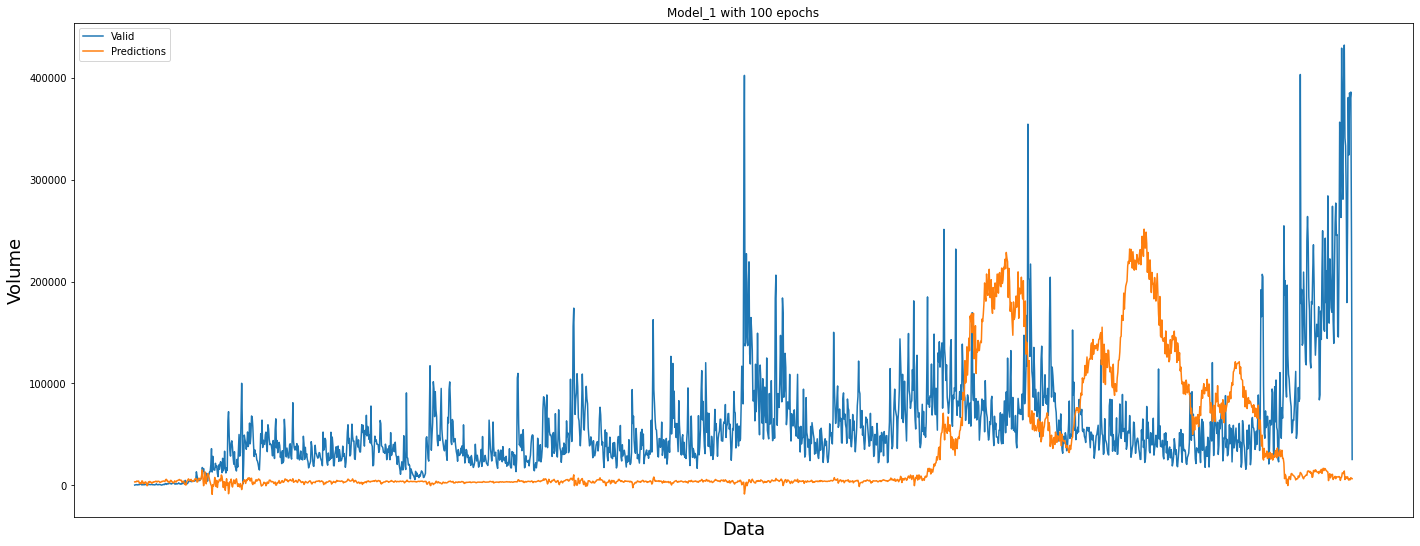

In [ ]:
nums=4
plt.figure(figsize=(24, 20))
plt.subplot(2, 1, 1)
plt.title(f'Model_1 with {epochs} epochs')
plt.xticks([])
plt.xlabel('Data', fontsize=18)
plt.ylabel(f'{dic[nums] if nums==4 else dic[nums]+" Price(USD)"}', fontsize=18)
plt.plot(combined[dic[nums]])
plt.plot(combined['pred_'+dic[nums]]/10**6)
plt.legend(['Valid', 'Predictions'], loc='upper left')

In [ ]:
from pandas.core.internals import concat
# KD指標參數
N=10
roll_data=df.rolling(N)
roll_data.max()["High"].dropna()
messure_data=pd.concat([combined ,roll_data.max()["High"].rename("High_N").dropna()],axis=1)
messure_data=pd.concat([messure_data ,roll_data.min()["Low"].rename("Low_N").dropna()],axis=1)
messure_data=messure_data.dropna()
messure_data["RSV"]=(messure_data["Close"]-messure_data["Low_N"])/(messure_data["High_N"]-messure_data["Low_N"])
klist=[messure_data["RSV"][0]]
for i in range(1,messure_data.shape[0]):
  klist.append(klist[-1]*0.66+messure_data["RSV"][i]*0.33)
messure_data["K"]=klist
dlist=[messure_data["K"][0]] 
for i in range(1,messure_data.shape[0]):
  dlist.append(dlist[-1]*0.66+messure_data["K"][i]*0.33)
messure_data["D"]=dlist
signal=[0]
for i in range(1,messure_data.shape[0]):
  if messure_data["K"][i-1] < messure_data["D"][i-1] and messure_data["K"][i] > messure_data["D"][i]:
    signal.append(1)
  elif messure_data["K"][i-1] > messure_data["D"][i-1] and messure_data["K"][i] < messure_data["D"][i]:
    signal.append(-1)
  else:
    signal.append(0)
messure_data["KDsignal"]=signal
messure_data["next_pred_Close"]=messure_data["pred_Close"].shift(1)
comparing_data=messure_data.dropna().loc[:,["Close","pred_Close","next_pred_Close","KDsignal"]]
comparing_data["pred_Rate"]=(comparing_data["next_pred_Close"]-comparing_data["pred_Close"])/comparing_data["pred_Close"]
dlsignal=[]
therehold=0.01
for i in range (comparing_data.shape[0]):
  if comparing_data["pred_Rate"][i]>therehold:
    dlsignal.append(1)
  elif comparing_data["pred_Rate"][i]<=-therehold:
    dlsignal.append(-1)
  else:
    dlsignal.append(0)
comparing_data["Model_signal"]=dlsignal

In [ ]:
comparing_data

,Close,pred_Close,next_pred_Close,KDsignal,pred_Rate,Model_signal
open_day,,,,,,
2017-08-28,4386.69,4704.857910,4728.277832,0,0.004978,0
2017-08-29,4587.48,4703.209473,4704.857910,0,0.000350,0
2017-08-30,4555.14,4902.473633,4703.209473,0,-0.040646,-1
2017-08-31,4724.89,5010.737793,4902.473633,0,-0.021606,-1
2017-09-01,4834.91,5126.104980,5010.737793,0,-0.022506,-1
...,...,...,...,...,...,...
2022-09-21,18461.36,20861.560547,21124.050781,0,0.012582,1
2022-09-22,19401.63,20667.699219,20861.560547,0,0.009380,0
2022-09-23,19289.91,20981.121094,20667.699219,1,-0.014938,-1


In [ ]:
def simulate(prices,signals):
  hold=0
  buy=[]
  sell=[]
  for price, signal in zip(prices,signals):
    if hold and signal==-1:
      hold=0
      sell.append(price)
    elif not hold and signal==1:
      hold=1
      buy.append(price)
  margin= [y - x for x, y in zip(buy,sell)]
  return margin

In [ ]:
# 測試次數、回測天數與隨機取交易開始日
test_count=10000
periods=200
sample_period = pd.DataFrame(np.random.randint(0,messure_data.shape[0]-periods-1,size=test_count), columns=["start"])
sample_period["end"]=sample_period["start"]+periods
loc_iloc_trans={y:x for x,y in enumerate(comparing_data.columns)}

In [ ]:
# 衡量投資績效
model_res, model_odds, model_io = [],[],[]
kd_res, kd_odds, kd_io = [],[],[]
hold_res, hold_odds = [],[]
for ii in range (test_count):
  period=sample_period.iloc[ii,:]
  model_evaluate=simulate(comparing_data.iloc[period[0]:period[1],loc_iloc_trans["Close"]],comparing_data.iloc[period[0]:period[1],loc_iloc_trans["Model_signal"]])
  model_count=len(model_evaluate)
  model_res.append(sum(model_evaluate))
  model_io.append(model_count)
  model_odds.append(sum(1 if x>0 else 0 for x in model_evaluate)/model_count)

  kd_evaluate=simulate(comparing_data.iloc[period[0]:period[1],loc_iloc_trans["Close"]],comparing_data.iloc[period[0]:period[1],loc_iloc_trans["KDsignal"]])
  kd_count=len(kd_evaluate)
  kd_res.append(sum(kd_evaluate))
  kd_io.append(kd_count)
  kd_odds.append(sum(1 if x>0 else 0 for x in kd_evaluate)/kd_count)

  profit=comparing_data.iloc[period[0],loc_iloc_trans["Close"]] - comparing_data.iloc[period[1],loc_iloc_trans["Close"]]
  hold_res.append(profit)
  hold_odds.append(1 if profit>0 else 0)

model_res=pd.DataFrame(model_res)
model_odds=pd.DataFrame(model_odds)
model_io=pd.DataFrame(model_io)
kd_res=pd.DataFrame(kd_res)
kd_odds=pd.DataFrame(kd_odds)
kd_io=pd.DataFrame(kd_io)
hold_res=pd.DataFrame(hold_res)
hold_odds=pd.DataFrame(hold_odds)

print(f"模型平均報酬:{model_res.mean()[0]:.2f}")
print(f"模型平均勝率:{model_odds.mean()[0]:.2%}")
print(f"模型平均進出次數:{model_io.mean()[0]:.2f}")
print(f"模型簡化夏普比率:{model_res.mean()[0]/model_res.std()[0]:.2f}")
print(f"KD指標操作平均報酬:{kd_res.mean()[0]:.2f}")
print(f"KD指標操作平均勝率:{kd_odds.mean()[0]:.2%}")
print(f"KD指標操作平均進出次數:{kd_io.mean()[0]:.2f}")
print(f"KD指標操作簡化夏普比率:{kd_res.mean()[0]/model_res.std()[0]:.2f}")
print(f"買入持有平均報酬:{hold_res.mean()[0]:.2f}")
print(f"買入持有平均勝率:{hold_odds.mean()[0]:.2%}")
print("買入持有平均進出次數:1")
print(f"買入持有簡化夏普比率:{hold_res.mean()[0]/hold_res.std()[0]:.2f}")


模型平均報酬:253.41
模型平均勝率:55.99%
模型平均進出次數:28.50
模型簡化夏普比率:0.03
KD指標操作平均報酬:4733.90
KD指標操作平均勝率:39.72%
KD指標操作平均進出次數:14.57
KD指標操作簡化夏普比率:0.48
買入持有平均報酬:-2335.14
買入持有平均勝率:45.43%
買入持有平均進出次數:1
買入持有簡化夏普比率:-0.16
